<a href="https://colab.research.google.com/github/Akashkunwar/IIT-Madras-Datahacks/blob/main/Data_Hacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --q

     |████████████████████████████████| 62 kB 954 kB/s 


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [14]:
# importing liberary
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# # Downloading Data
# df = yf.download('RELIANCE.NS')

# # Plotting graph 
# plt.figure(figsize = (20,10))
# plt.title('Price ')
# plt.plot(df['Open'])
# plt.show()

# Import Data
def get_data(x):
  global data_name
  data_name = x
  global df
  df = yf.download(x)

# Plot
def plot_data(x):
  plt.figure(figsize = (20,10))
  plt.title('Plot of Stock price of {}'.format(x))
  plt.plot(df['Open'])
  plt.show()

[*********************100%***********************]  1 of 1 completed


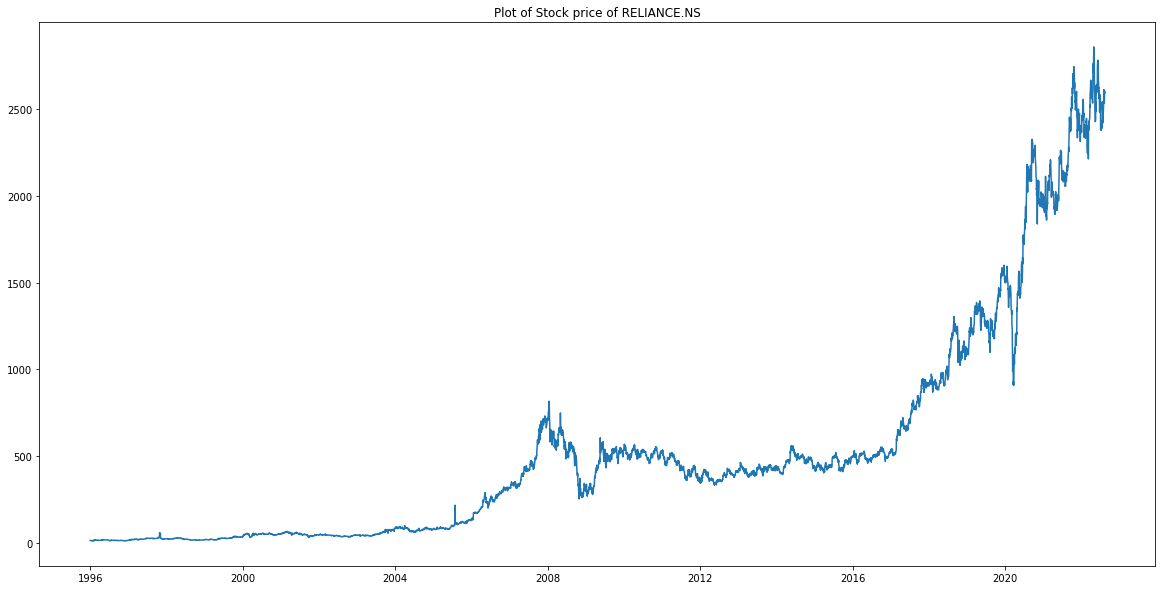

In [87]:
get_data('RELIANCE.NS')
plot_data(data_name)

In [88]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509535,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427810,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506982,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409935,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338422,76935930
...,...,...,...,...,...,...
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2534.000000,6434433
2022-08-08,2531.000000,2583.550049,2531.000000,2567.149902,2567.149902,4691228
2022-08-10,2576.899902,2589.899902,2557.050049,2582.500000,2582.500000,4949442


In [89]:
# df['Date'] = df.index

In [90]:
df.insert(0,'Date',df.index)

In [91]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1996-01-01,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509535,48051995
1996-01-02,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427810,77875009
1996-01-03,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506982,96602936
1996-01-04,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409935,100099436
1996-01-05,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338422,76935930
...,...,...,...,...,...,...,...
2022-08-05,2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2534.000000,6434433
2022-08-08,2022-08-08,2531.000000,2583.550049,2531.000000,2567.149902,2567.149902,4691228
2022-08-10,2022-08-10,2576.899902,2589.899902,2557.050049,2582.500000,2582.500000,4949442


In [92]:
import pandas as pd
import numpy as np

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6695 entries, 1996-01-01 to 2022-08-12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6695 non-null   datetime64[ns]
 1   Open       6695 non-null   float64       
 2   High       6695 non-null   float64       
 3   Low        6695 non-null   float64       
 4   Close      6695 non-null   float64       
 5   Adj Close  6695 non-null   float64       
 6   Volume     6695 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 418.4 KB


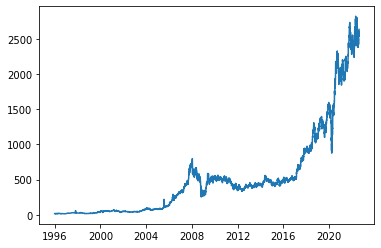

In [94]:
close = df.Close
plt.plot(close)

In [95]:
close

Date
1996-01-01      15.917452
1996-01-02      15.793671
1996-01-03      15.913584
1996-01-04      15.766594
1996-01-05      15.658285
                 ...     
2022-08-05    2534.000000
2022-08-08    2567.149902
2022-08-10    2582.500000
2022-08-11    2591.100098
2022-08-12    2633.000000
Name: Close, Length: 6695, dtype: float64

In [96]:
# from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1,1))

In [97]:
close

array([[0.00143405],
       [0.00138997],
       [0.00143267],
       ...,
       [0.91547239],
       [0.91853515],
       [0.93345698]])

In [98]:
##splitting dataframe
train_size=int(len(close)*0.70)
test_size=len(close)-train_size
train_df,test_df=close[0:train_size,:],close[train_size:len(close),:1]

In [99]:
train_size,test_size

(4686, 2009)

In [100]:
len(close)

6695

In [101]:
train_df

array([[0.00143405],
       [0.00138997],
       [0.00143267],
       ...,
       [0.18804279],
       [0.18393284],
       [0.17958474]])

In [102]:
def create_dataset(df, time_step=1):
	dfx, dfy = [], []
	for i in range(len(df)-time_step-1):
		a = df[i:(i+time_step), 0]
		dfx.append(a)
		dfy.append(df[i + time_step, 0])
	return np.array(dfx), np.array(dfy)

In [103]:
time_step = 100
X_train, y_train = create_dataset(train_df, time_step)
X_test, y_test = create_dataset(test_df, time_step)

In [104]:
print(X_train.shape), print(y_train.shape)

(4585, 100)
(4585,)


(None, None)

In [105]:
print(X_test.shape), print(y_test.shape)

(1908, 100)
(1908,)


(None, None)

In [106]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [107]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [108]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=50,verbose=1)

Epoch 1/100
92/92 [==============================] - 23s 189ms/step - loss: 5.9376e-04 - val_loss: 0.0013
Epoch 2/100
92/92 [==============================] - 19s 205ms/step - loss: 5.0086e-05 - val_loss: 0.0033
Epoch 3/100
92/92 [==============================] - 20s 219ms/step - loss: 4.3920e-05 - val_loss: 0.0048
Epoch 4/100
92/92 [==============================] - 16s 172ms/step - loss: 3.9446e-05 - val_loss: 0.0045
Epoch 5/100
92/92 [==============================] - 20s 214ms/step - loss: 4.3255e-05 - val_loss: 0.0040
Epoch 6/100
92/92 [==============================] - 17s 187ms/step - loss: 3.4177e-05 - val_loss: 0.0053
Epoch 7/100
92/92 [==============================] - 16s 172ms/step - loss: 3.3219e-05 - val_loss: 0.0060
Epoch 8/100
92/92 [==============================] - 16s 172ms/step - loss: 3.2979e-05 - val_loss: 0.0038
Epoch 9/100
92/92 [==============================] - 17s 182ms/step - loss: 3.1017e-05 - val_loss: 0.0034
Epoch 10/100
92/92 [==========================

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.8.2'

In [110]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [111]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [112]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

22.067745774113448

In [113]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

121.46721839287657

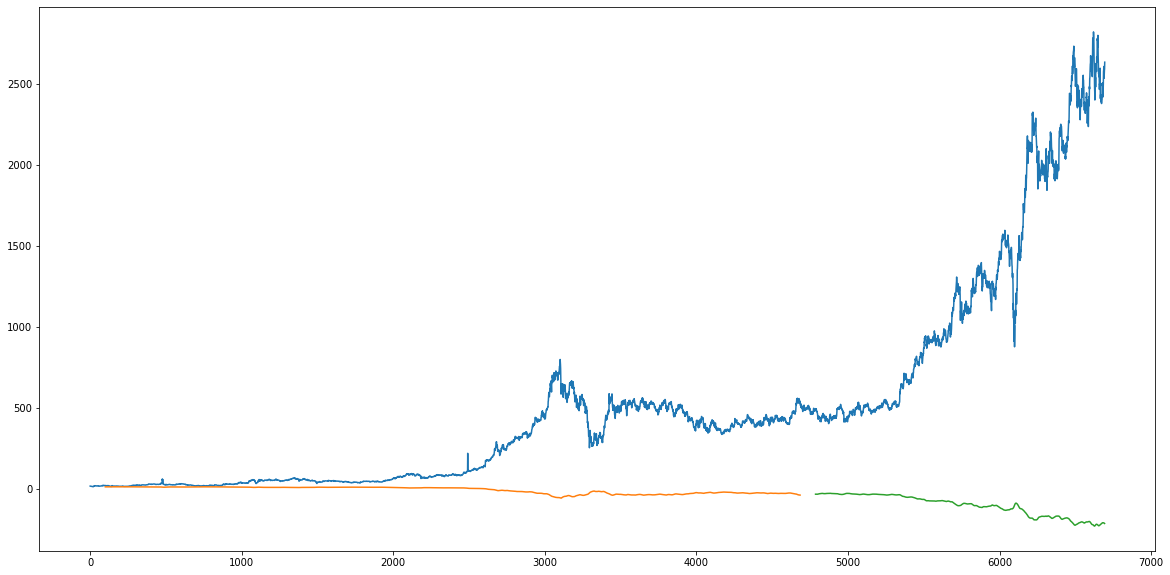

In [114]:
### Plotting 
plt.figure(figsize=(20,10))
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [115]:
df.Date

Date
1996-01-01   1996-01-01
1996-01-02   1996-01-02
1996-01-03   1996-01-03
1996-01-04   1996-01-04
1996-01-05   1996-01-05
                ...    
2022-08-05   2022-08-05
2022-08-08   2022-08-08
2022-08-10   2022-08-10
2022-08-11   2022-08-11
2022-08-12   2022-08-12
Name: Date, Length: 6695, dtype: datetime64[ns]